In [1]:
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess MNIST data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
autoencoder = Sequential([
        # Encoder
        Input(shape=(28,28,1)),
        Conv2D(32, (3,3), activation="relu", padding="same"),
        MaxPooling2D((2,2), padding="same"),
        Conv2D(32, (3,3), activation="relu", padding="same"),
        MaxPooling2D((2,2), padding="same"),
        Conv2D(32, (3,3), activation="relu", padding="same"),
        MaxPooling2D((2,2), padding="same"),

        # Decoder
        Conv2D(32, (3,3), activation="relu", padding="same"),
        UpSampling2D((2,2)),
        Conv2D(32, (3,3), activation="relu", padding="same"),
        UpSampling2D((2,2)),
        Conv2D(32, (3,3), activation="relu", padding="valid"),
        UpSampling2D((2,2)),
        Conv2D(1, (3,3), activation="sigmoid", padding="same"),
    ])

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [4]:


# Train the autoencoder
history = autoencoder.fit(
    x_train, x_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)



Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - loss: 0.3218 - val_loss: 0.1174
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 133ms/step - loss: 0.1134 - val_loss: 0.1009
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 78ms/step - loss: 0.1004 - val_loss: 0.0948
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 0.0946 - val_loss: 0.0908
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - loss: 0.0912 - val_loss: 0.0892
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0888 - val_loss: 0.0862
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 86ms/step - loss: 0.0868 - val_loss: 0.0842
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - loss: 0.0853 - val_loss: 0.0832
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - loss: 0.0840 - val_loss: 0.0818
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - loss: 0.0827 - val_loss: 0.0813


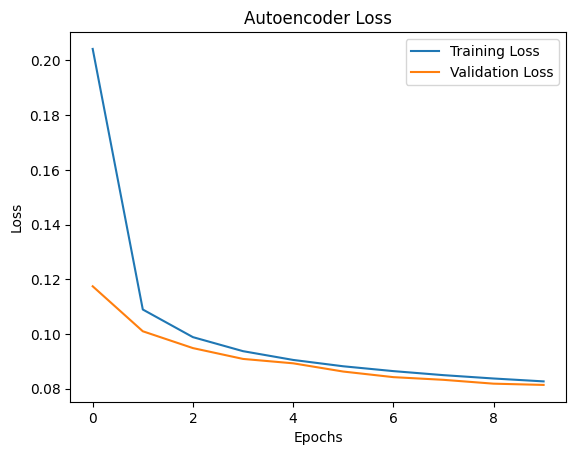

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


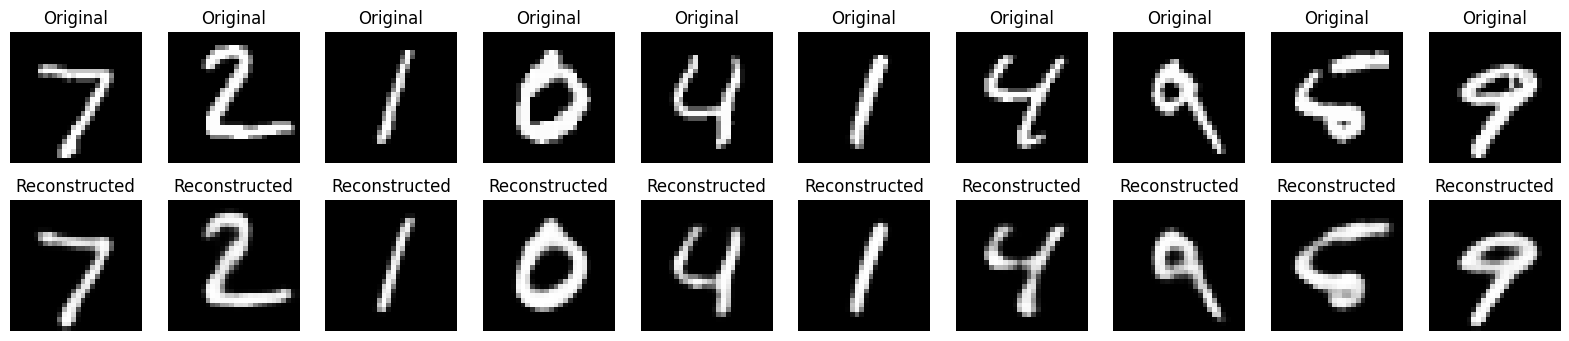

In [5]:
# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Encode and decode some digits
encoded_imgs = autoencoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off") 
plt.show()